In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Cargar el dataset de pingüinos
df = sns.load_dataset("penguins")

In [ ]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
#cambia object por categorie
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     342 non-null    float64 
 3   bill_depth_mm      342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


<Axes: >

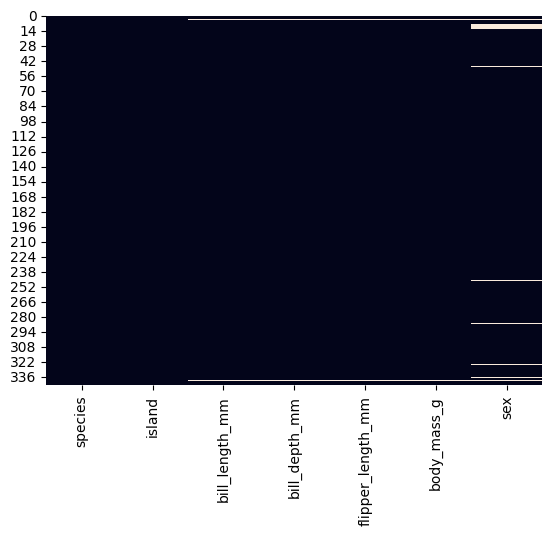

In [ ]:
#mostrar mapa con datos null
sns.heatmap(df.isnull(), cbar=False)

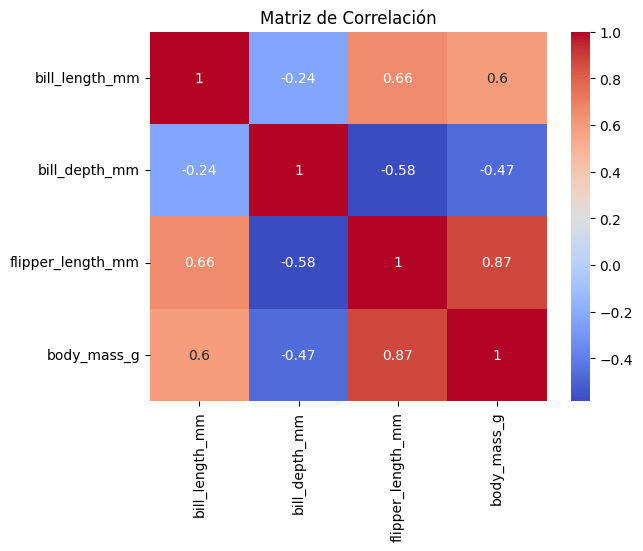

In [ ]:
#Pese a los datos nulos, hoy s´lo practicaremos gráficos y su análisis

#Cruzar variables numéricas para identificar relaciones fuertes.
numeric_df = df.select_dtypes(include=['number']) # Seleccionar solo columnas numéricas
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')

plt.show()

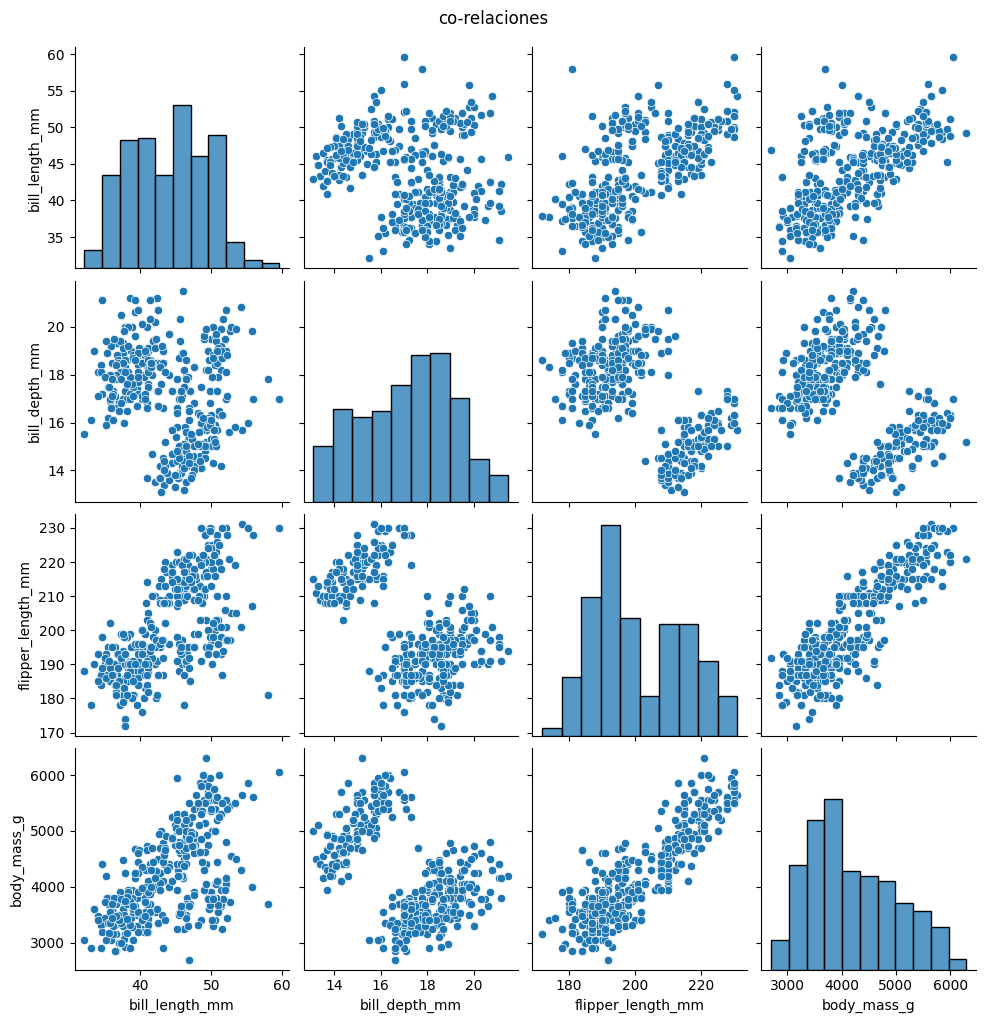

In [ ]:
# colores = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']
# cambiar colores por specie
# df['species'] = df['species'].cat.rename_categories(colores) # This line caused the error

sns.pairplot(df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])
plt.suptitle("co-relaciones", y=1.02)
plt.show()

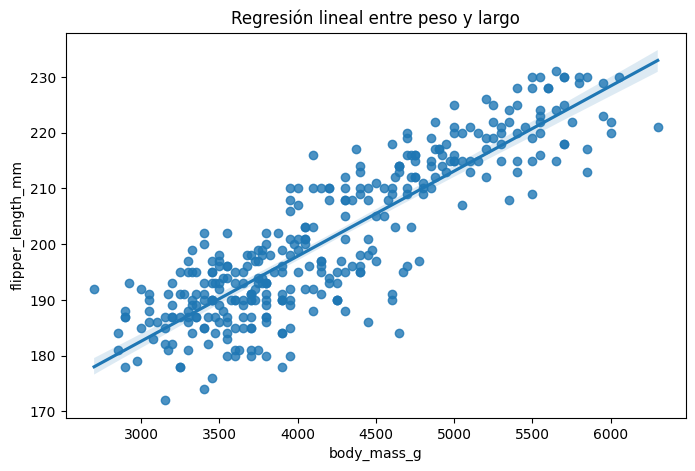

Promedio de body_mass_g: 4201.754385964912
Promedio de flipper_length_mm: 200.91520467836258


In [ ]:
colores = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']  # un color para cada día (Thur, Fri, Sat, Sun)

plt.figure(figsize=(8,5))
sns.regplot(x='body_mass_g', y='flipper_length_mm', data=df)
plt.title("Regresión lineal entre peso y largo")
plt.show()

#Calcular promedio de boddy_mass_g y bill_length_mm
promedio_body_mass = df['body_mass_g'].mean()
promedio_flipper_length_mm = df['flipper_length_mm'].mean()
print(f"Promedio de body_mass_g: {promedio_body_mass}")
print(f"Promedio de flipper_length_mm: {promedio_flipper_length_mm}")


# plt.figure(figsize=(8,5))
# sns.boxplot(x='promedio_body_mass', y='promedio_bill_length', data=df, palette=colores)
# plt.title("Distribución del peso y altura (Boxplot)")
# plt.show()

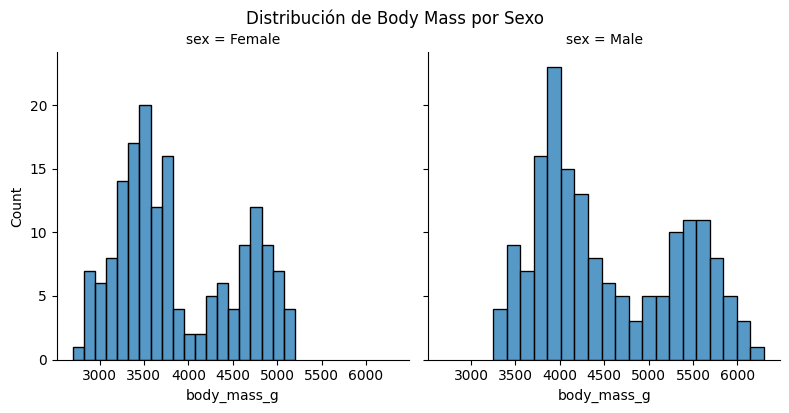

In [ ]:
g = sns.FacetGrid(df, col='sex', row='ody_mass_g', height=4)
g.map(sns.histplot, 'sex', bins=20)
g.fig.suptitle("Distribución del total por sexo y turno", y=1.02)
plt.show()

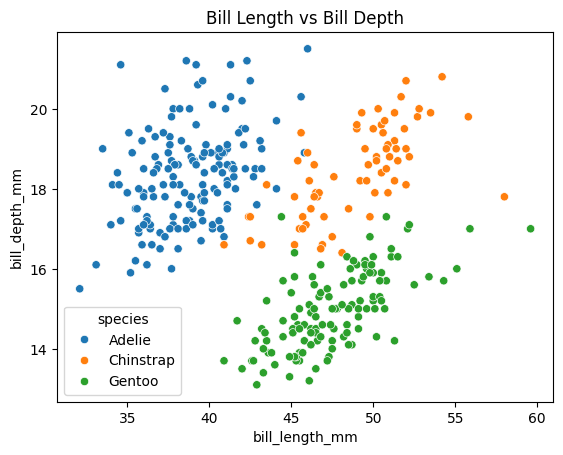

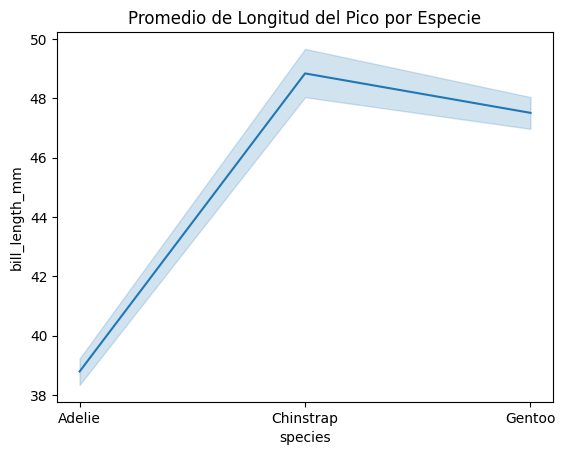

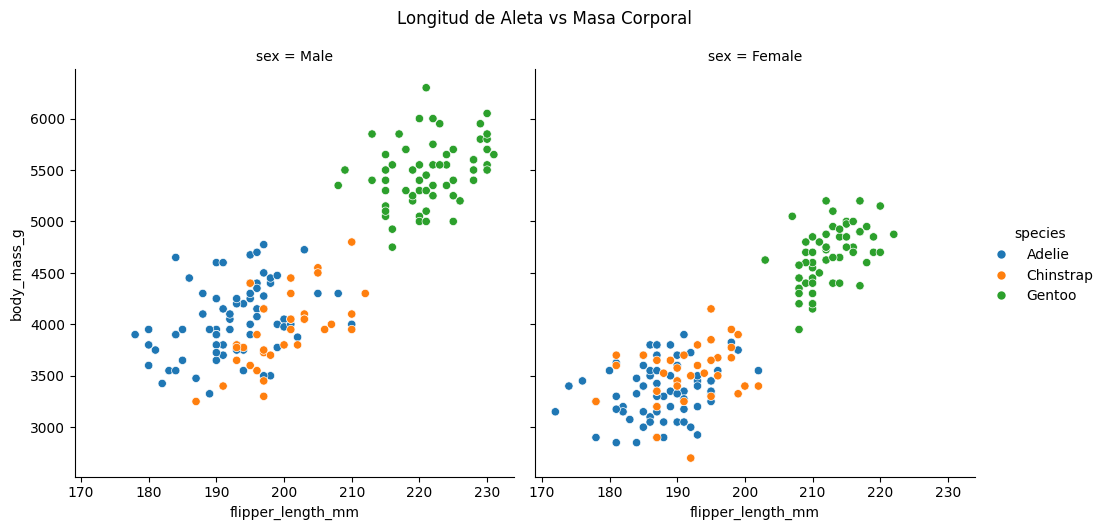

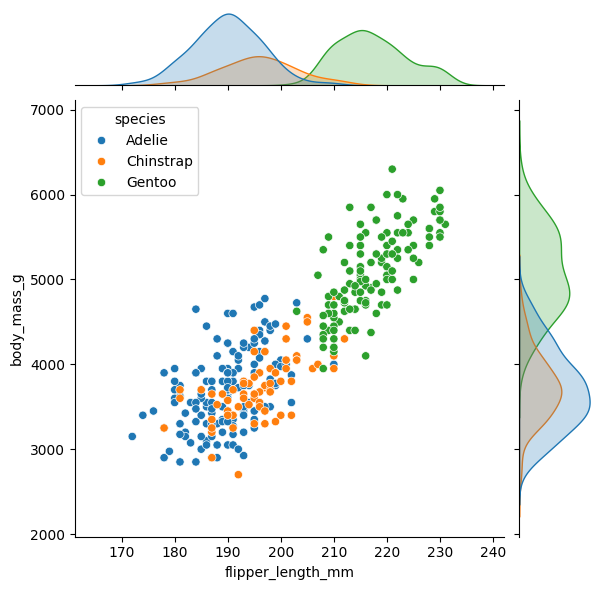

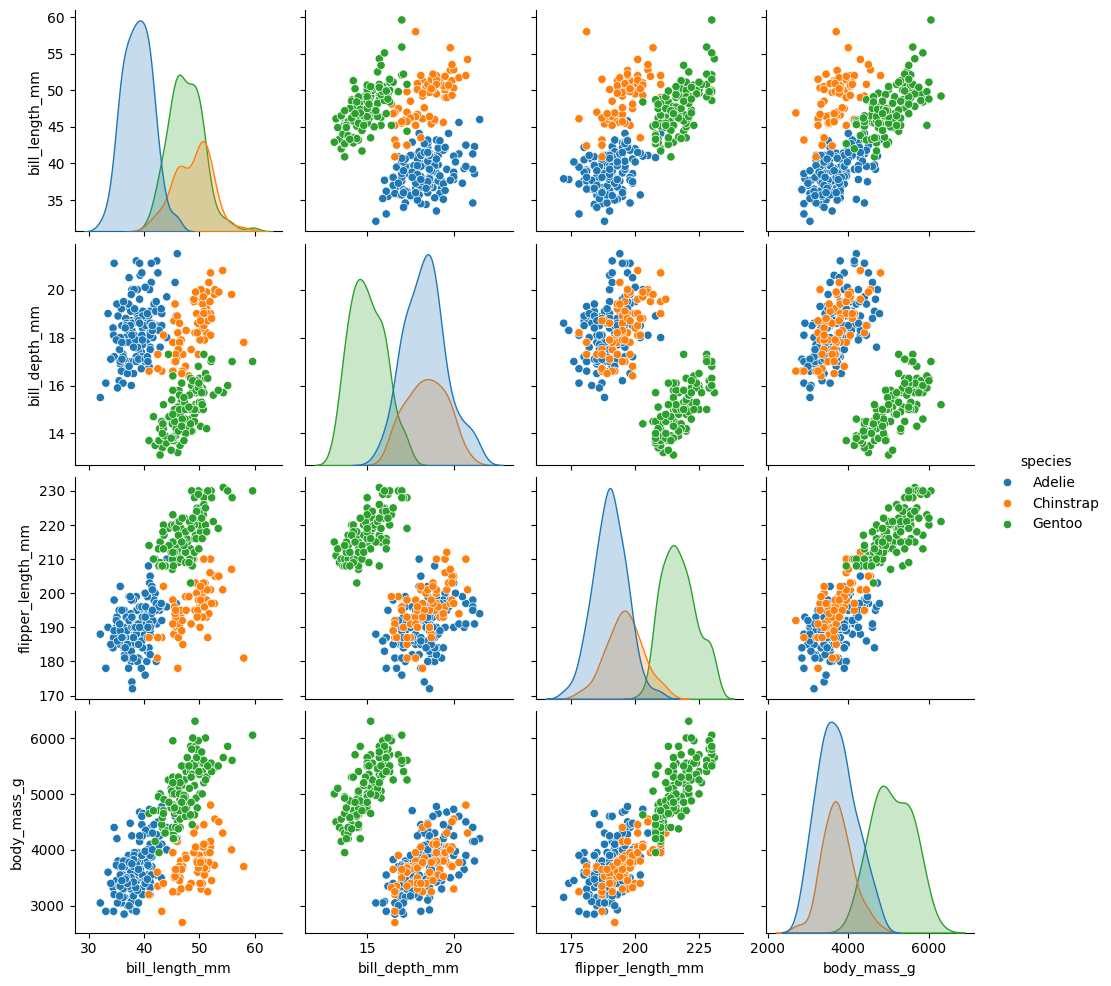

In [ ]:
# Scatterplot
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.title("Bill Length vs Bill Depth")
plt.show()

# Lineplot (promedio de bill_length por especie)
sns.lineplot(data=penguins, x="species", y="bill_length_mm", estimator='mean')
plt.title("Promedio de Longitud del Pico por Especie")
plt.show()

# Relplot
sns.relplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species", col="sex")
plt.suptitle("Longitud de Aleta vs Masa Corporal", y=1.05)
plt.show()

# Jointplot
sns.jointplot(data=penguins, x="flipper_length_mm", y="body_mass_g", kind="scatter", hue="species")
plt.show()

# Pairplot
sns.pairplot(penguins.dropna(), hue="species")
plt.show()

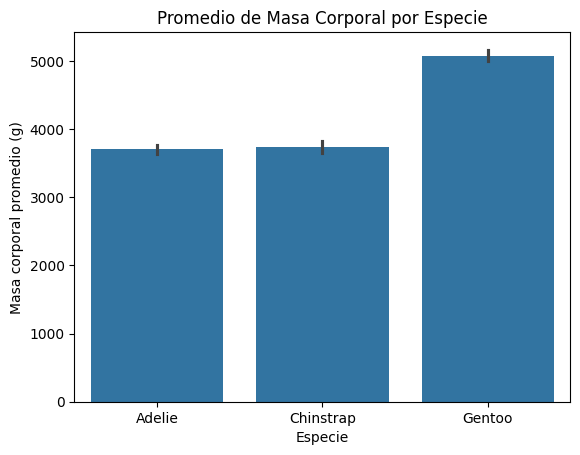

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
penguins = sns.load_dataset("penguins")

# Crear el gráfico
colores = ['#FF9999', '#66B3FF','#99FF99']
sns.barplot(data=penguins, x="species", y="body_mass_g", estimator="mean")
plt.title("Promedio de Masa Corporal por Especie")
plt.xlabel("Especie")
plt.ylabel("Masa corporal promedio (g)")
plt.show()